In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,Stock Turnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,60320,1584606.40,9578.0,344712.22,64889.97,17598.14,68601.68,-1239894.18,-359.689651,0.158786,0.217538
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,96073,1553500.41,20226.0,444810.74,43304.31,37163.76,257032.07,-1108689.67,-249.249753,0.210527,0.286328
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,62385,1446708.15,9203.0,275162.97,52289.50,16909.12,144929.24,-1171545.18,-425.764114,0.147519,0.190199
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75385,1375022.40,11189.0,288135.11,48202.30,20557.97,123780.22,-1086887.29,-377.214457,0.148425,0.209549
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,58783,1286759.87,11883.0,357759.17,52774.51,21833.58,257032.07,-929000.70,-259.672086,0.202150,0.278031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8507,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
8508,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
8509,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222
8510,3960,DIAGEO NORTH AMERICA INC,3775,Smirnoff Sorbet Pine/Coconut,0.73,0.99,50.0,1,0.73,0.0,0.00,0.00,0.00,257032.07,-0.73,-inf,0.000000,0.000000


In [3]:
df.to_csv('vendor_sales_summary.csv', index = False)

In [4]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8512.0,1.015346e+04,17718.122212,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8512.0,1.760026e+04,13004.702546,58.00,5297.750000,17432.500000,24988.000000,9.063100e+04
PurchasePrice,8512.0,2.188977e+01,105.829821,0.36,6.800000,10.270000,18.240000,5.681810e+03
ActualPrice,8512.0,3.218842e+01,144.210224,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,8512.0,8.548756e+02,617.982459,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8512.0,1.691844e+03,5496.001551,1.00,24.000000,231.500000,1195.000000,1.607350e+05
TotalPurchaseDollars,8512.0,1.578656e+04,56938.194190,0.71,344.880000,2840.535000,12601.875000,1.584606e+06
TotalSalesQuantity,8512.0,2.872162e+02,967.741069,0.00,3.000000,34.000000,200.000000,2.854400e+04
TotalSalesDollars,8512.0,3.873112e+03,13541.331564,0.00,59.940000,649.745000,3129.827500,4.448107e+05
TotalSalesPrice,8512.0,1.890345e+03,4290.868376,0.00,22.692500,363.675000,1831.792500,6.488997e+04


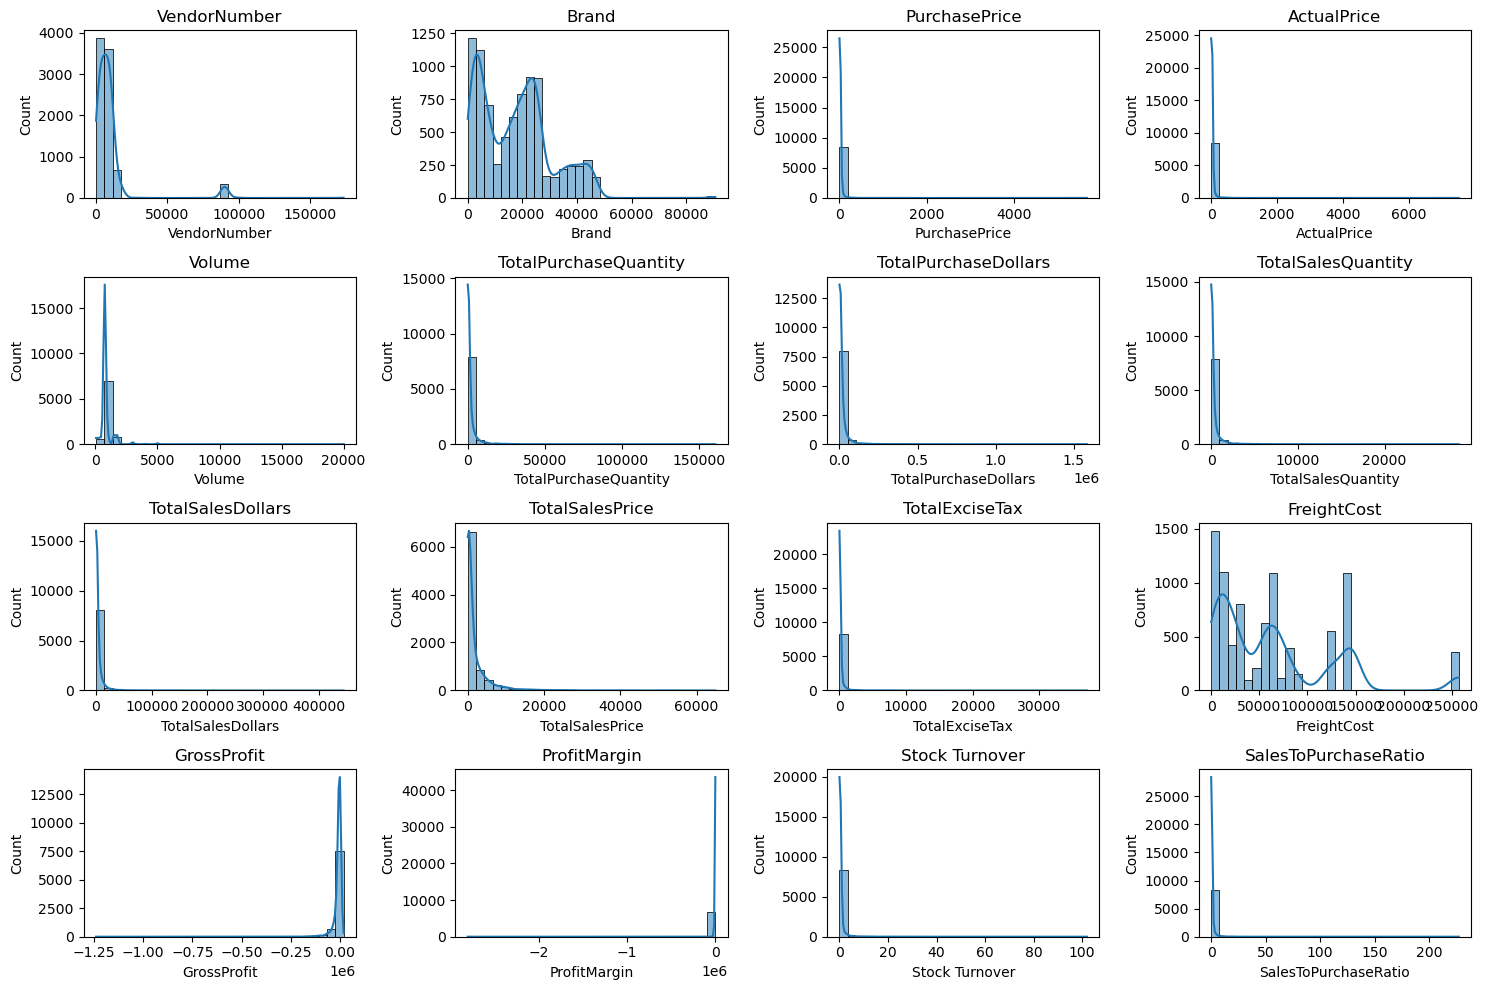

In [5]:
# Distribution plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

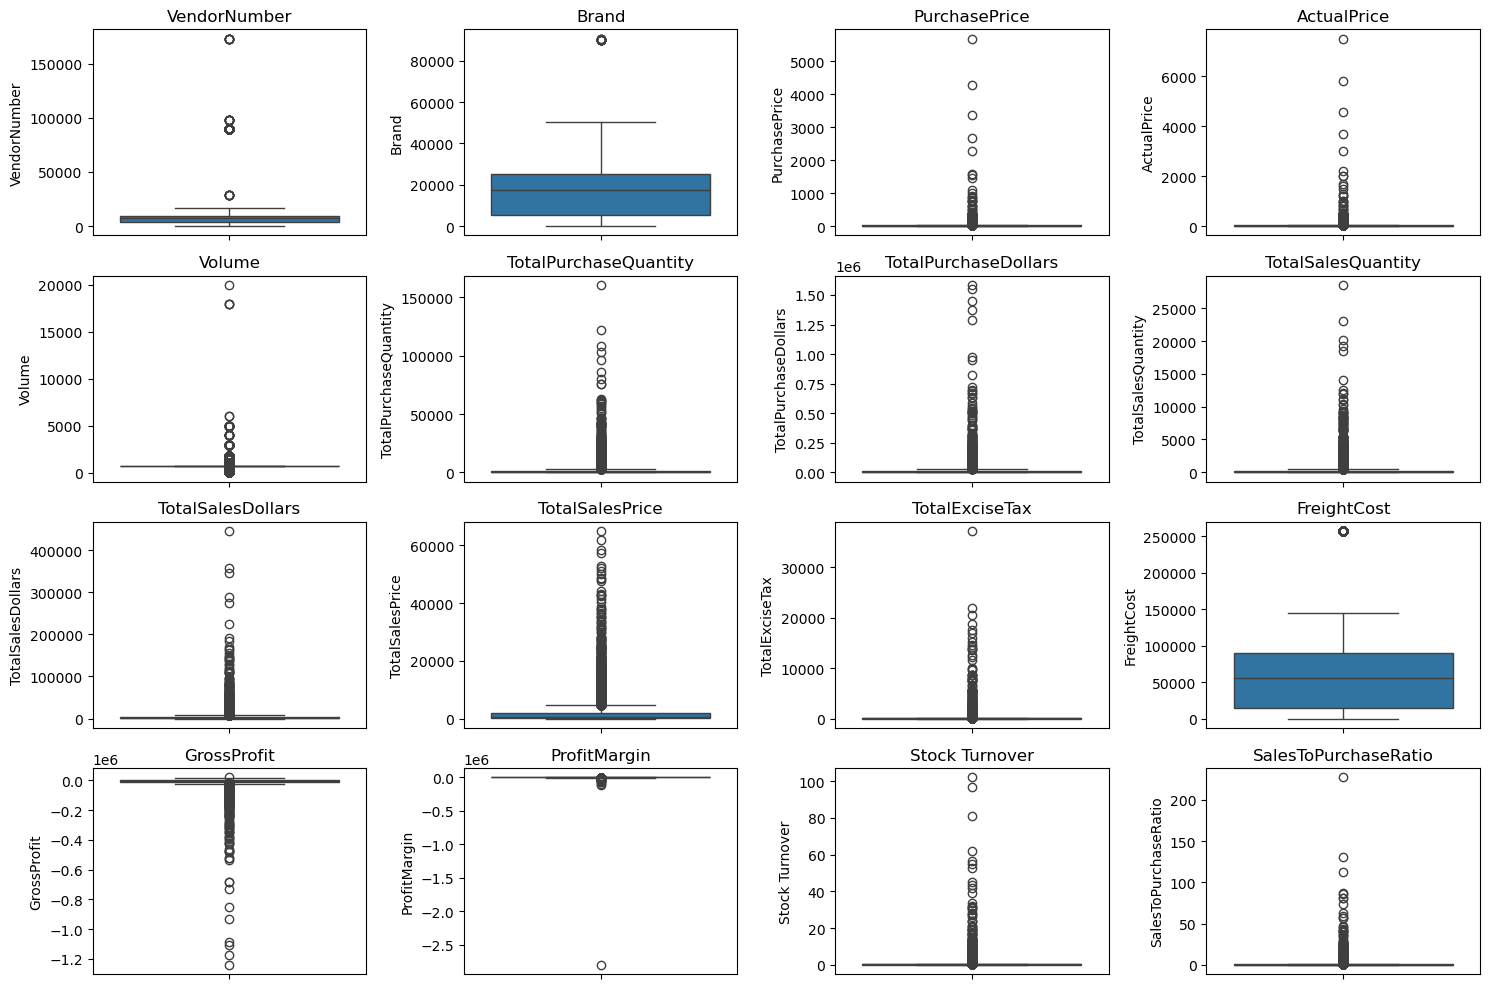

In [6]:
#Outlier detection with BoxPlots
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
#Let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
        FROM vendor_sales_summary
        WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0""", conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,Stock Turnover,SalesToPurchaseRatio
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,11199,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,4194,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5723,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,249,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,15.99,750.0,2241,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902,15.000000,22.820122
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
980,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222


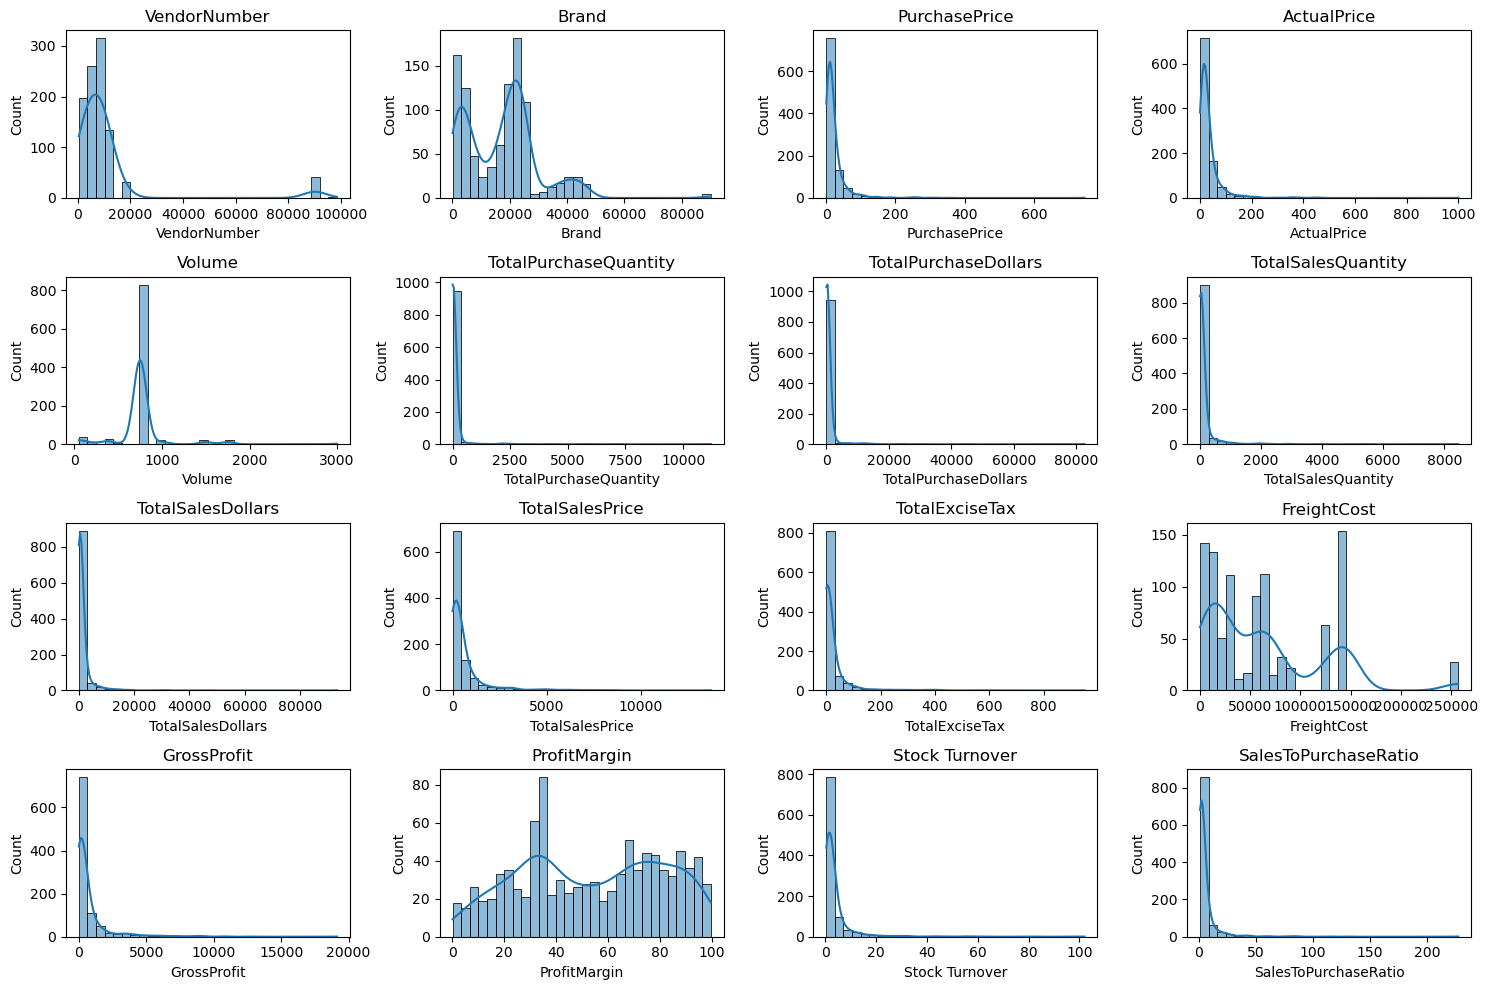

In [9]:
# Distribution plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

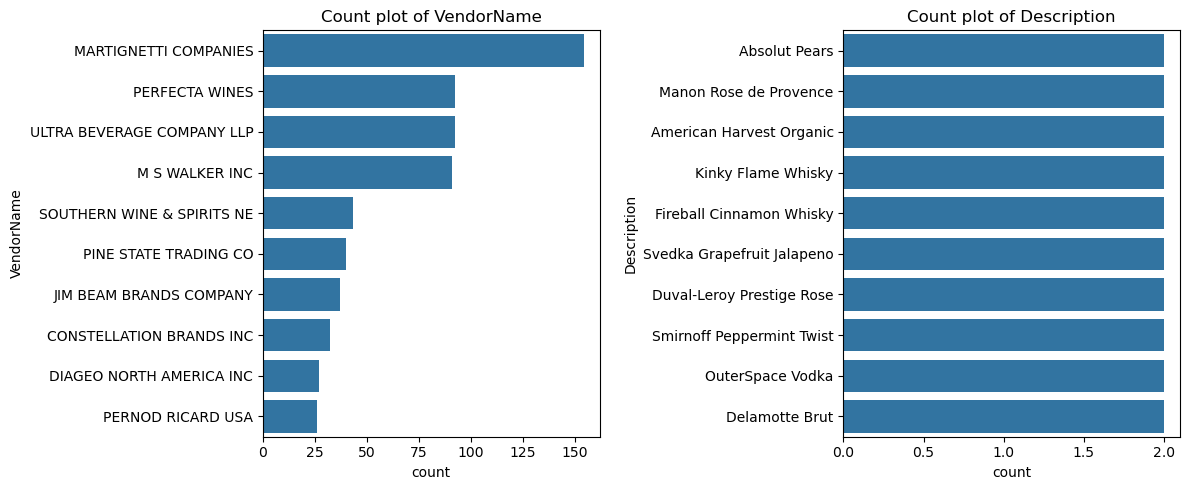

In [10]:
# Count plots for Categorical columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

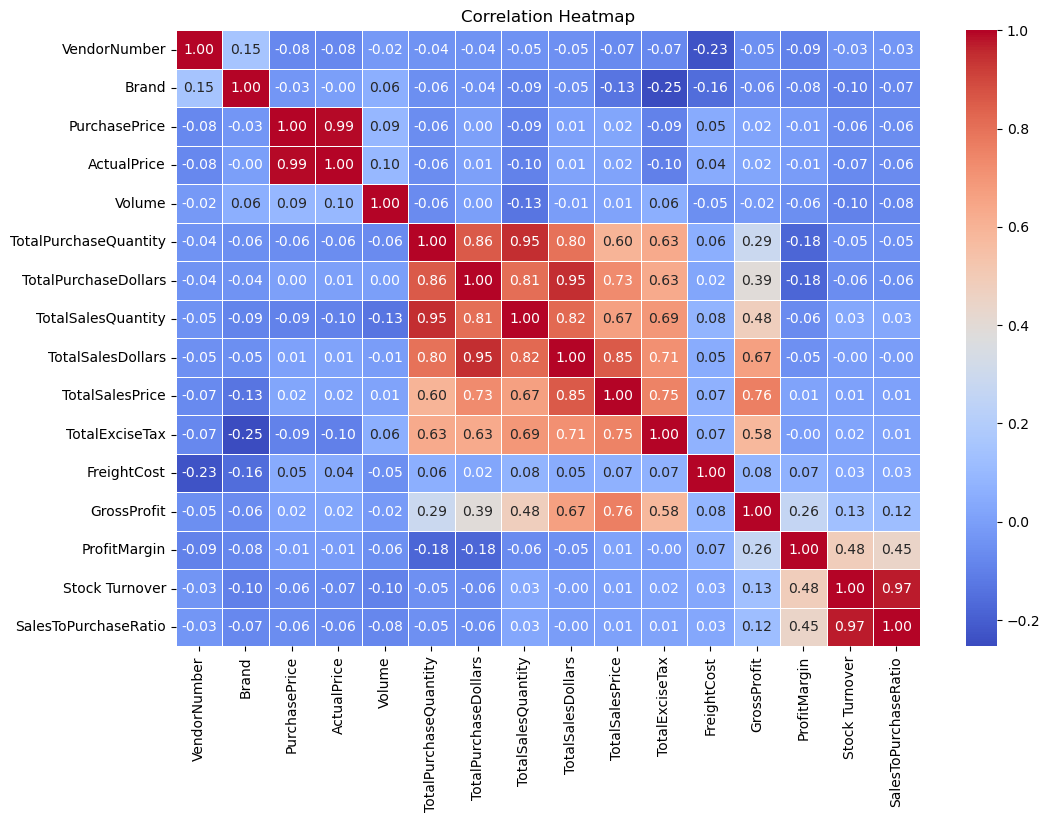

In [11]:
#Correlation Heatmap
plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

## Data Analysis


Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

np.float64(117.98)

In [15]:
high_margin_threshold

np.float64(86.42455041969913)

In [16]:
# Filter brands with low sales but high profit margin
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
915,Tracia Syrah,44.94,88.495772
64,Bacardi Oakheart Spiced Trav,59.94,87.554221
272,Chicken & Turkey Cotes du Rh,59.94,90.990991
349,Dr McGillicuddy's Apple Pie,62.72,96.269133
837,St Elder Elderflower Liqueur,66.33,91.436756
46,Aresti Pnt Nr Curico Vly,74.85,95.617902
324,DeKuyper Buttershots Trav,76.93,90.718835
900,Three Olives Grape Vodka,80.19,99.114603
838,St Germain Liqueur,89.94,87.658439
699,Piehole Apple Pie,98.01,95.592287


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<1000] # for better visualization

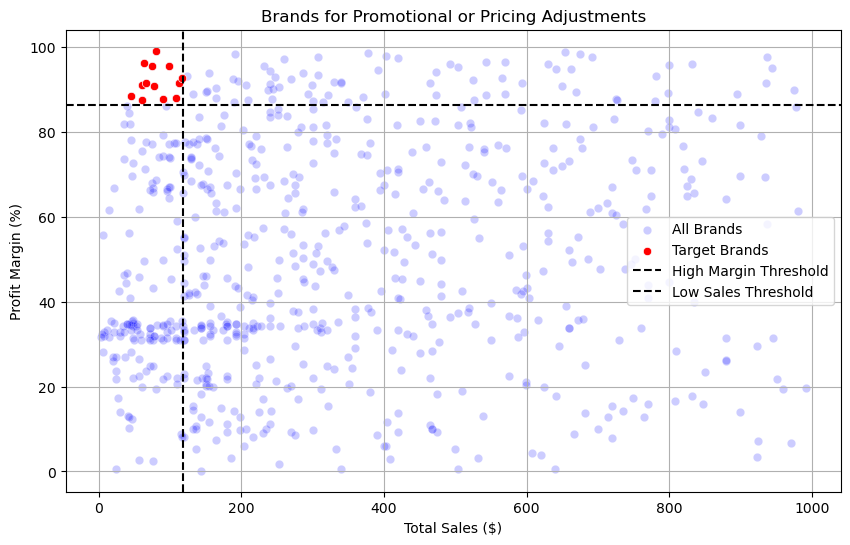

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "blue", label = "All Brands", alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', color = "red", label = "Target Brands")

plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

## Which vendors and brands demonstrate the highest sales performance?

In [19]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [20]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         243980.10
CONSTELLATION BRANDS INC      180305.21
ULTRA BEVERAGE COMPANY LLP    148726.20
M S WALKER INC                117693.77
PERFECTA WINES                114277.24
BACARDI USA INC                61602.49
BROWN-FORMAN CORP              46884.09
DIAGEO NORTH AMERICA INC       42011.94
JIM BEAM BRANDS COMPANY        41429.49
SOUTHERN WINE & SPIRITS NE     40497.96
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands

Description
Simi Chard                      93369.42
Simi Cab Svgn                   46523.13
Banfi Centine Mntcln Tscna      31728.09
Rodney Strong Cab Svgn          31245.60
Ch La Rousseliere St Estephe    29698.02
Buehler Chard RRV               27397.25
Madison's Ranch Cab Svgn        24797.91
Rodney Strong Chard             20080.57
Cava Mistinguett Brut           18241.17
Bacardi Twin Pack 2/750mls      17331.33
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands.apply(lambda x : format_dollars(x))

Description
Simi Chard                      93.37K
Simi Cab Svgn                   46.52K
Banfi Centine Mntcln Tscna      31.73K
Rodney Strong Cab Svgn          31.25K
Ch La Rousseliere St Estephe    29.70K
Buehler Chard RRV               27.40K
Madison's Ranch Cab Svgn        24.80K
Rodney Strong Chard             20.08K
Cava Mistinguett Brut           18.24K
Bacardi Twin Pack 2/750mls      17.33K
Name: TotalSalesDollars, dtype: object

In [23]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
MARTIGNETTI COMPANIES         243.98K
CONSTELLATION BRANDS INC      180.31K
ULTRA BEVERAGE COMPANY LLP    148.73K
M S WALKER INC                117.69K
PERFECTA WINES                114.28K
BACARDI USA INC                61.60K
BROWN-FORMAN CORP              46.88K
DIAGEO NORTH AMERICA INC       42.01K
JIM BEAM BRANDS COMPANY        41.43K
SOUTHERN WINE & SPIRITS NE     40.50K
Name: TotalSalesDollars, dtype: object

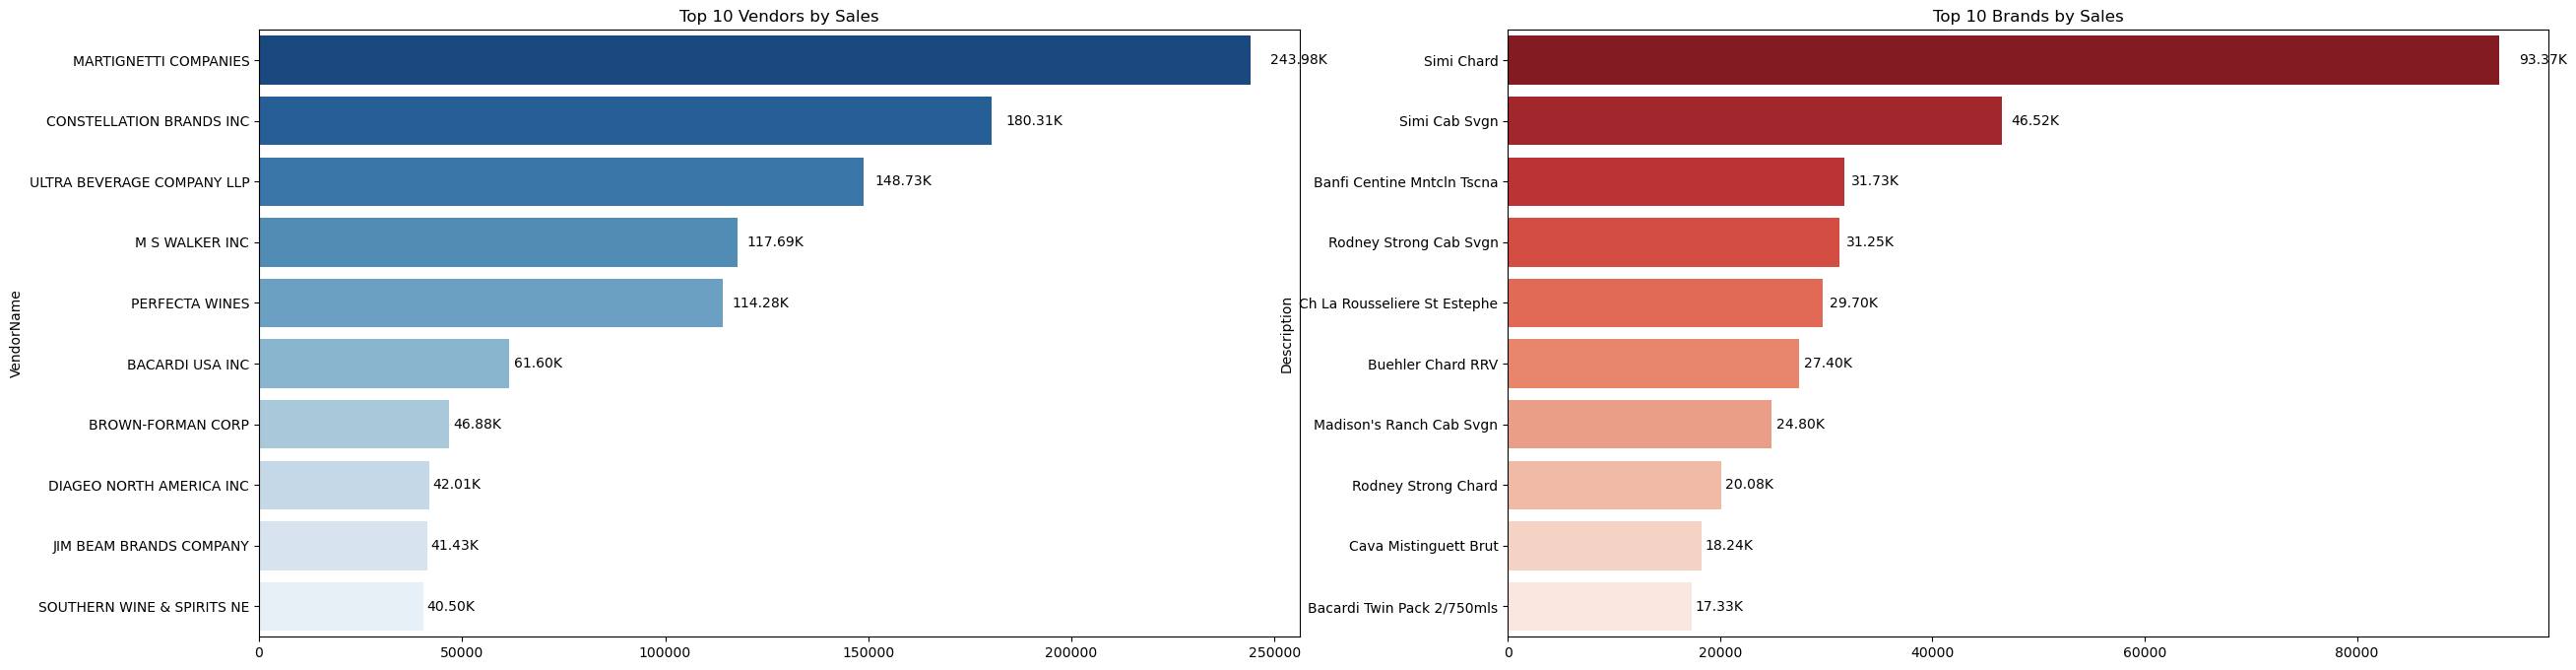

In [24]:
plt.figure(figsize = (30, 8))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')

#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette = "Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')
    

## Which vendors contribute most to total purchase dollars

In [25]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()
vendor_performance.shape

(72, 4)

In [26]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100

In [27]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [28]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors["TotalSalesDollars"] = top_vendors["TotalSalesDollars"].apply(format_dollars)
top_vendors["TotalPurchaseDollars"] = top_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_vendors["GrossProfit"] = top_vendors["GrossProfit"].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
9,CONSTELLATION BRANDS INC,155.18K,25.12K,180.31K,21.19
33,MARTIGNETTI COMPANIES,106.12K,137.86K,243.98K,14.49
42,PERFECTA WINES,65.88K,48.39K,114.28K,8.99
63,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.78
31,M S WALKER INC,46.58K,71.11K,117.69K,6.36
3,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.63
2,BACARDI USA INC,30.94K,30.66K,61.60K,4.22
14,DIAGEO NORTH AMERICA INC,20.88K,21.13K,42.01K,2.85
26,JIM BEAM BRANDS COMPANY,18.69K,22.74K,41.43K,2.55
55,STATE WINE & SPIRITS,15.26K,22.06K,37.32K,2.08


In [29]:
top_vendors['PurchaseContribution%'].sum()

np.float64(75.14)

In [30]:
# Cumulative Sum
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
9,CONSTELLATION BRANDS INC,155.18K,25.12K,180.31K,21.19,21.19
33,MARTIGNETTI COMPANIES,106.12K,137.86K,243.98K,14.49,35.68
42,PERFECTA WINES,65.88K,48.39K,114.28K,8.99,44.67
63,ULTRA BEVERAGE COMPANY LLP,56.97K,91.76K,148.73K,7.78,52.45
31,M S WALKER INC,46.58K,71.11K,117.69K,6.36,58.81
3,BANFI PRODUCTS CORP,33.93K,3.67K,37.59K,4.63,63.44
2,BACARDI USA INC,30.94K,30.66K,61.60K,4.22,67.66
14,DIAGEO NORTH AMERICA INC,20.88K,21.13K,42.01K,2.85,70.51
26,JIM BEAM BRANDS COMPANY,18.69K,22.74K,41.43K,2.55,73.06
55,STATE WINE & SPIRITS,15.26K,22.06K,37.32K,2.08,75.14


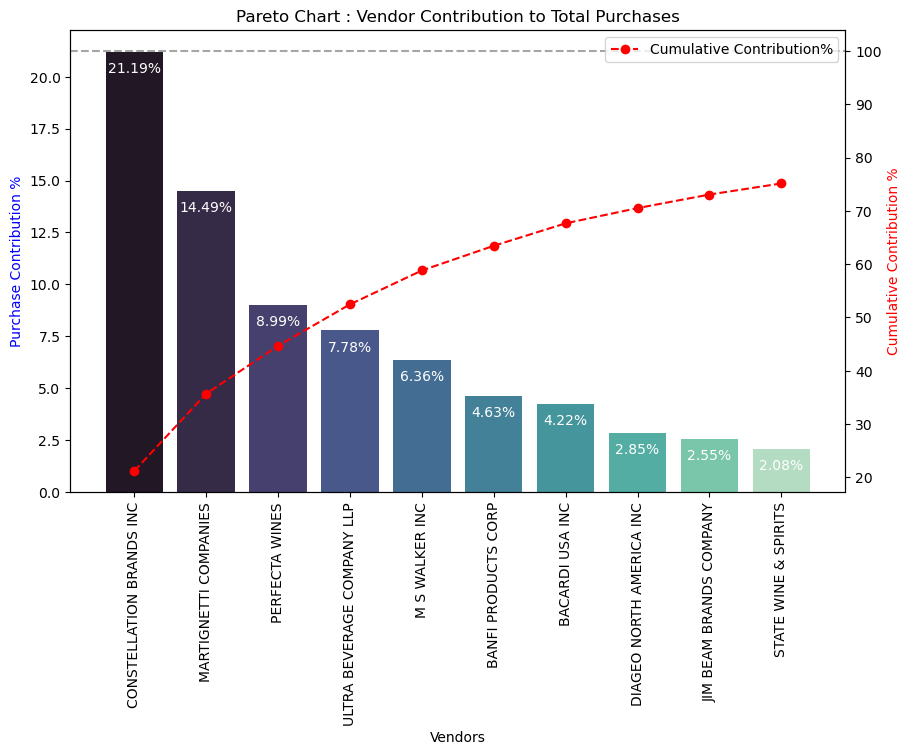

In [31]:
fig, ax1 = plt.subplots(figsize = (10,6))

# Bar plot for Purchase Contribution%
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = "mako", ax = ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha = 'center', fontsize = 10, color = 'white')

# Line plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color = 'red', marker = 'o', linestyle = 'dashed', label = 'Cumulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.7)
ax2.legend(loc = 'upper right')

plt.show()

## How much of total procurement is dependent on the top vendors?

In [32]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")

Total Purchase Contribution of top 10 vendors is 75.14 %


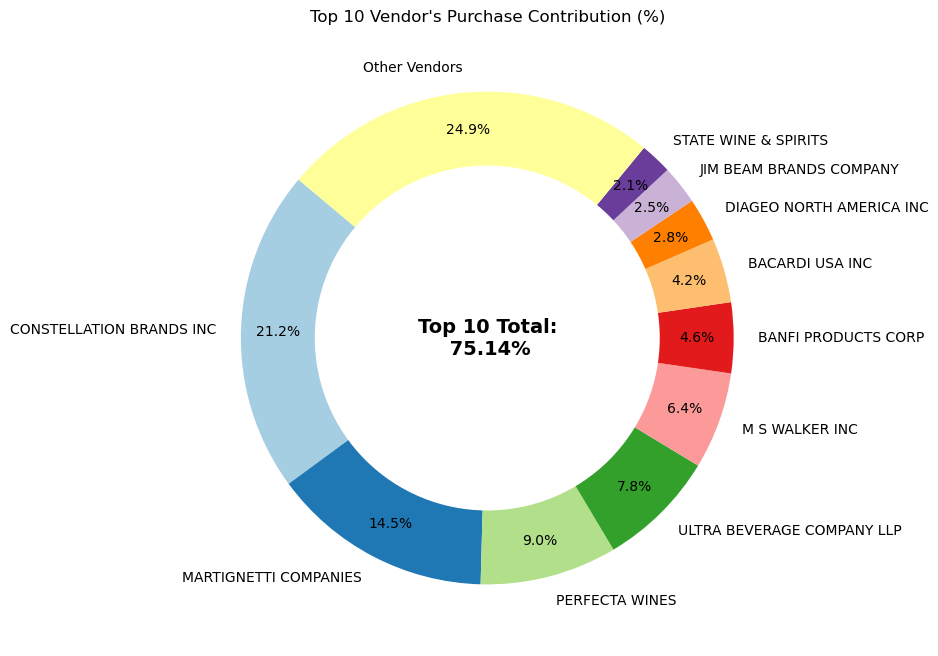

In [33]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contributions = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels = vendors, autopct = '%1.1f%%',
                                  startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig.gca().add_artist(center_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n {total_contribution:.2f}%", fontsize = 14, fontweight = 'bold', ha = 'center', va = 'center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [34]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [35]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,Stock Turnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1392,CONSTELLATION BRANDS INC,6650,Simi Chard,7.38,14.99,750.0,11199,82648.62,8458.0,93369.42,13558.87,949.79,79528.99,10720.80,11.482132,0.755246,1.129715,7.38
1,1392,CONSTELLATION BRANDS INC,22143,Simi Cab Svgn,10.52,18.99,750.0,4194,44120.88,2887.0,46523.13,13703.56,323.21,79528.99,2402.25,5.163561,0.688364,1.054447,10.52
2,516,BANFI PRODUCTS CORP,18152,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,5723,30102.98,3891.0,31728.09,7605.68,436.17,8510.41,1625.11,5.121991,0.679888,1.053985,5.26
3,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,249,24733.17,198.0,29698.02,1199.92,22.24,28720.52,4964.85,16.717781,0.795181,1.200737,99.33
4,4425,MARTIGNETTI COMPANIES,8781,Rodney Strong Cab Svgn,10.32,15.99,750.0,2241,23127.12,1840.0,31245.60,11934.97,205.53,144929.24,8118.48,25.982794,0.821062,1.351037,10.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,95.617902,15.000000,22.820122,3.28
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39
980,9815,WINE GROUP INC,22407,Three Wishes Chard,2.25,3.29,750.0,1,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222,2.25


In [36]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q = 3, labels = ["Small", "Medium", "Large"])

In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,35.900600
Medium,20.687564
Large,11.248938


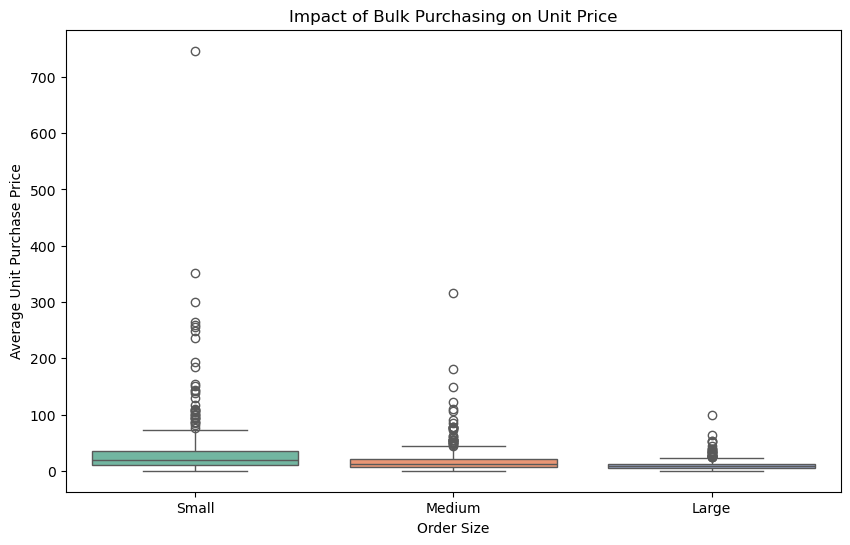

In [38]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice", palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [39]:
df[df['Stock Turnover']<1].groupby('VendorName')[['Stock Turnover']].mean().sort_values('Stock Turnover', ascending = True).head(10)

,Stock Turnover
VendorName,
PALM BAY INTERNATIONAL INC,0.666667
WILLIAM GRANT & SONS INC,0.695652
WINE GROUP INC,0.704774
TREASURY WINE ESTATES,0.705882
CONSTELLATION BRANDS INC,0.726606
BANFI PRODUCTS CORP,0.727246
STE MICHELLE WINE ESTATES,0.727273
E & J GALLO WINERY,0.730680
Russian Standard Vodka,0.730769


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [49]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -250988.90000000002


In [41]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
9,CONSTELLATION BRANDS INC,35.23K
3,BANFI PRODUCTS CORP,9.89K
62,TRINCHERO FAMILY ESTATES,3.80K
23,FREDERICK WILDMAN & SONS,3.11K
71,WINE GROUP INC,2.58K
53,SIDNEY FRANK IMPORTING CO,561.55
64,VINEXTRA INC,201.57
39,NICHE W & S,192.72
61,TREASURY WINE ESTATES,190.9
40,OLE SMOKY DISTILLERY LLC,135.6


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [42]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [43]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [44]:
top_vendors

0      11.482132
1       5.163561
2       5.121991
3      16.717781
4      25.982794
         ...    
812    96.916213
814    97.877620
916    98.763142
923    98.766655
938    98.837168
Name: ProfitMargin, Length: 246, dtype: float64

In [45]:
low_vendors

498     7.320644
505    14.980228
518     0.167224
533    11.739608
553     5.351885
         ...    
977    95.617902
978    55.778894
979    96.269133
980    31.610942
981    99.114603
Name: ProfitMargin, Length: 246, dtype: float64

In [46]:
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err

    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (57.47, 64.50), Mean: 60.99
Low Vendors 95% CI: (43.82, 50.11), Mean: 46.96


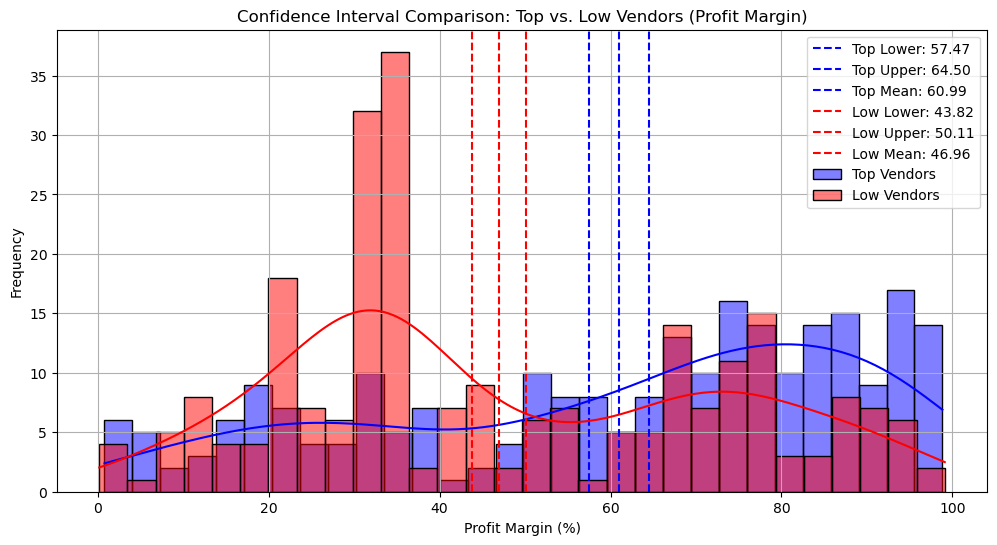

In [47]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize = (12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde = True, color = "blue", bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(top_lower, color = "blue", linestyle = "--", label = f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color = "blue", linestyle = "--", label = f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color = "blue", linestyle = "--", label = f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde = True, color = "red", bins = 30, alpha = 0.5, label = "Low Vendors")
plt.axvline(low_lower, color = "red", linestyle = "--", label = f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color = "red", linestyle = "--", label = f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color = "red", linestyle = "--", label = f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

#### Is there a significant difference in profit margins between top-performing and low-performing vendors?
#### Hypothesis:
#### Ho (Null Hypthesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
#### H1 (Alternate Hypthesis): There is a significant difference in the mean profit margins of top-performing and low-performing vendors.

In [48]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Print results
print(f"T-Statistics: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins.")

T-Statistics: 5.8581, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.


In [50]:
df[df["TotalSalesQuantity"] > df["TotalPurchaseQuantity"]]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,Stock Turnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
10,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750.0,1359,11932.02,1909.0,...,6105.30,214.06,68054.70,12865.89,51.882961,1.404709,2.078266,8.78,Large,-4829.00
11,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,785,11625.85,867.0,...,7196.40,683.00,89286.27,5705.48,32.920036,1.104459,1.490758,14.81,Large,-1214.42
17,4425,MARTIGNETTI COMPANIES,26383,Buehler Chard RRV,7.89,15.99,750.0,1046,8252.94,2275.0,...,8141.28,254.66,144929.24,19144.31,69.876758,2.174952,3.319696,7.89,Large,-9696.81
18,8112,MOET HENNESSY USA INC,1024,Hennessey VS +VSOP 50mL,19.99,31.99,750.0,375,7496.25,512.0,...,3190.91,403.26,48347.26,7287.63,49.294434,1.365333,1.972170,19.99,Large,-2738.63
20,10754,PERFECTA WINES,2208,WhistlePig 10 Yr Old Rye,53.95,74.99,750.0,133,7175.35,147.0,...,6989.07,115.82,28720.52,3863.18,34.997232,1.105263,1.538396,53.95,Large,-755.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,8004,SAZERAC CO INC,1059,Old St Nick's Egg Nog,3.40,4.49,750.0,1,3.40,32.0,...,101.83,25.19,50293.62,188.28,98.226210,32.000000,56.376471,3.40,Small,-105.40
977,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,...,39.92,1.68,2802.64,71.57,95.617902,15.000000,22.820122,3.28,Small,-45.92
978,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,...,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32,Small,-1.32
979,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,...,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39,Small,-47.58
